# Нормализация по мини-батчам

In [ ]:
from keras.datasets.mnist import load_data
from keras.utils import to_categorical
import numpy as np

(x_train, y_train), (x_test, y_test) = load_data()

x_train, x_test = x_train.astype(np.float64) / 255., x_test.astype(np.float64) / 255.
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

Создадим нашу модель

In [ ]:
from keras import Sequential
from keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(units=100, activation='tanh'),
    Dense(units=100, activation='tanh'),
    Dense(units=10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Посмотрим на процесс обучения

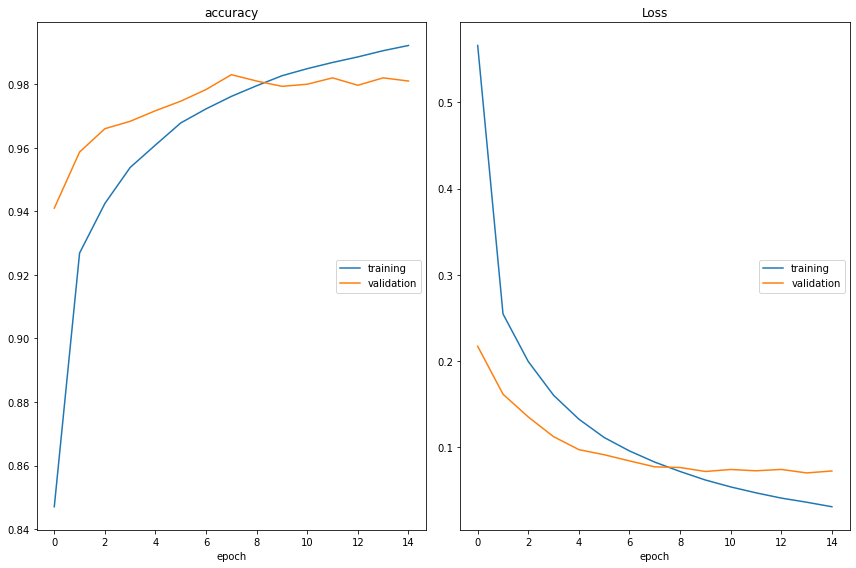

accuracy
	training         	 (min:    0.847, max:    0.992, cur:    0.992)
	validation       	 (min:    0.941, max:    0.983, cur:    0.981)
Loss
	training         	 (min:    0.031, max:    0.566, cur:    0.031)
	validation       	 (min:    0.070, max:    0.217, cur:    0.072)


In [ ]:
from livelossplot import PlotLossesKeras
from keras.callbacks import CSVLogger

model_logger_filename = 'log/mnist_two_dense.log'

model.fit(
    x_train, y_train,
    validation_split=0.05,
    batch_size=512,
    epochs=15,
    verbose=False,
    callbacks=[CSVLogger(model_logger_filename), PlotLossesKeras()]
)

Создадим теперь слой с нормализацией

In [ ]:
from keras.layers import BatchNormalization

bn_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(units=100, activation='tanh'),
    BatchNormalization(),
    Dense(units=100, activation='tanh'),
    Dense(units=10, activation='softmax')
])

bn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

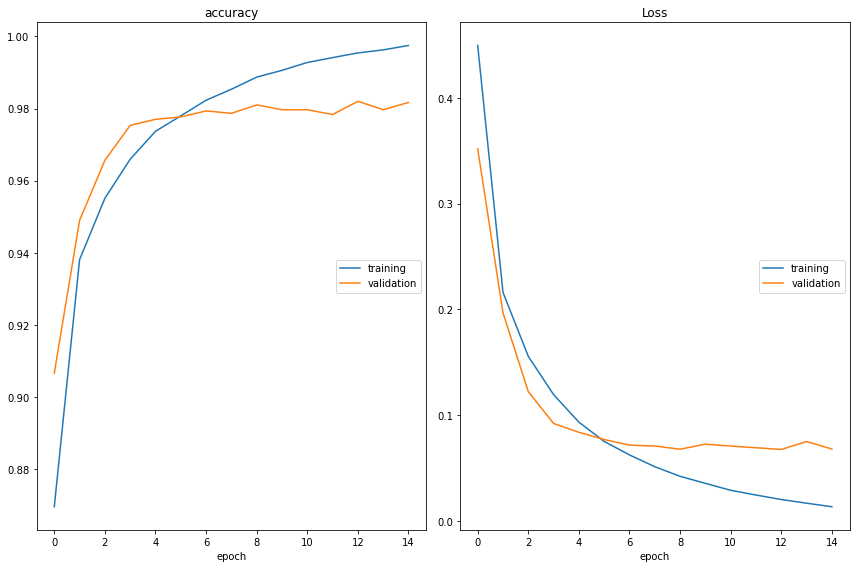

accuracy
	training         	 (min:    0.870, max:    0.997, cur:    0.997)
	validation       	 (min:    0.907, max:    0.982, cur:    0.982)
Loss
	training         	 (min:    0.014, max:    0.449, cur:    0.014)
	validation       	 (min:    0.068, max:    0.352, cur:    0.068)


In [ ]:
bn_model_logger_filename = 'log/mnist_batch_norm_two_dense.log'

bn_model.fit(
    x_train, y_train,
    validation_split=0.05,
    batch_size=512,
    epochs=15,
    verbose=False,
    callbacks=[CSVLogger(bn_model_logger_filename), PlotLossesKeras()]
)

In [ ]:
import pandas as pd

log_simple, log_bn = pd.read_csv(model_logger_filename), pd.read_csv(bn_model_logger_filename)
log_simple.head(), log_bn.head()

(   epoch  accuracy      loss  val_accuracy  val_loss
 0      0  0.847053  0.566000      0.941000  0.216949
 1      1  0.926877  0.254497      0.958667  0.161380
 2      2  0.942474  0.199222      0.966000  0.134900
 3      3  0.953807  0.160095      0.968333  0.112057
 4      4  0.960877  0.132343      0.971667  0.097012,
    epoch  accuracy      loss  val_accuracy  val_loss
 0      0  0.869649  0.449389      0.906667  0.351792
 1      1  0.938123  0.216085      0.949000  0.196800
 2      2  0.955123  0.155675      0.965667  0.122350
 3      3  0.965947  0.119527      0.975333  0.092279
 4      4  0.973684  0.093510      0.977000  0.083950)

Сравним результаты работы алгоритмов

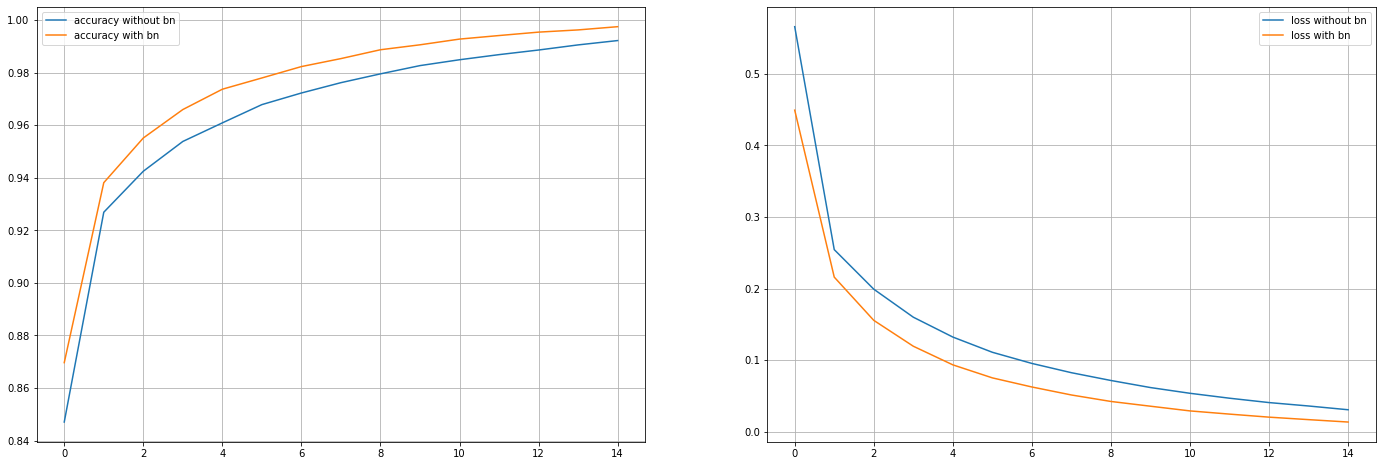

In [ ]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(ncols=2)

fig.set_size_inches((24, 8))

axes[0].plot(log_simple.epoch, log_simple.accuracy, label='accuracy without bn')
axes[0].plot(log_bn.epoch, log_bn.accuracy, label='accuracy with bn')
axes[0].legend()
axes[0].grid()

axes[1].plot(log_simple.epoch, log_simple.loss, label='loss without bn')
axes[1].plot(log_bn.epoch, log_bn.loss, label='loss with bn')
axes[1].legend()
axes[1].grid()

plt.show()
